# Data Visualization from Extraction Transformation and Loading (ETL) Process

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Step 1: Extract (Load Data)
# Load Excel Sheets
sales_df = pd.read_excel('Sales_data.xlsx', sheet_name='Sales Data')
customers_df = pd.read_csv('customers.csv')
products_df = pd.read_excel('products.xlsx')

print("Sales Data:")
print(sales_df.head())

print("Customers Data:")
print(customers_df.head())

print("\nProducts Data:")
print(products_df.head())

Sales Data:
   OrderDate   Region  Manager   SalesMan          Item  Units  Unit_price  \
0 2018-01-06     East   Martha  Alexander    Television   95.0      1198.0   
1 2018-01-23  Central  Hermann     Shelli  Home Theater   50.0       500.0   
2 2018-02-09  Central  Hermann       Luis    Television   36.0      1198.0   
3 2018-02-26  Central  Timothy      David    Cell Phone   27.0       225.0   
4 2018-03-15     West  Timothy    Stephen    Television   56.0      1198.0   

   Sale_amt  
0  113810.0  
1   25000.0  
2   43128.0  
3    6075.0  
4   67088.0  
Customers Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                  

In [22]:
# Step 2: Transform (Clean & Prepare)
# Clean Sales Data
sales_df.drop_duplicates(inplace=True)
sales_df["Units"].fillna(0, inplace=True)
sales_df["OrderDate"] = pd.to_datetime(sales_df["OrderDate"])

# Merge Customer Info into Sales
sales_df = pd.merge(sales_df, customers_df, how='left', left_on='SalesMan', right_on='Gender', suffixes=('', '_cust'))

# Merge Product Info into Sales
sales_df = pd.merge(sales_df, products_df[['Sales_Rep_Name', 'Value']], left_on='Manager', right_on='Sales_Rep_Name', how='left')

# Calculate Total Revenue (Units * Unit Price)
sales_df["TotalRevenue"] = sales_df["Units"] * sales_df["Unit_price"]

print("\nTransformed Data:")
print(sales_df.head())


Transformed Data:
   OrderDate   Region  Manager   SalesMan          Item  Units  Unit_price  \
0 2018-01-06     East   Martha  Alexander    Television   95.0      1198.0   
1 2018-01-23  Central  Hermann     Shelli  Home Theater   50.0       500.0   
2 2018-02-09  Central  Hermann       Luis    Television   36.0      1198.0   
3 2018-02-26  Central  Timothy      David    Cell Phone   27.0       225.0   
4 2018-03-15     West  Timothy    Stephen    Television   56.0      1198.0   

   Sale_amt  CustomerID Gender  Age  Annual Income (k$)  \
0  113810.0         NaN    NaN  NaN                 NaN   
1   25000.0         NaN    NaN  NaN                 NaN   
2   43128.0         NaN    NaN  NaN                 NaN   
3    6075.0         NaN    NaN  NaN                 NaN   
4   67088.0         NaN    NaN  NaN                 NaN   

   Spending Score (1-100) Sales_Rep_Name  Value  TotalRevenue  
0                     NaN            NaN    NaN      113810.0  
1                     NaN    

C:\Users\DELL\AppData\Local\Temp\ipykernel_18876\3275183061.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df["Units"].fillna(0, inplace=True)


In [23]:
# Step 3: Load (Ready for Analysis)
sales_df.to_excel("processed_sales.xlsx", index=False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18876\2223460042.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_revenue, x="Region", y="TotalRevenue", palette="Blues_d")


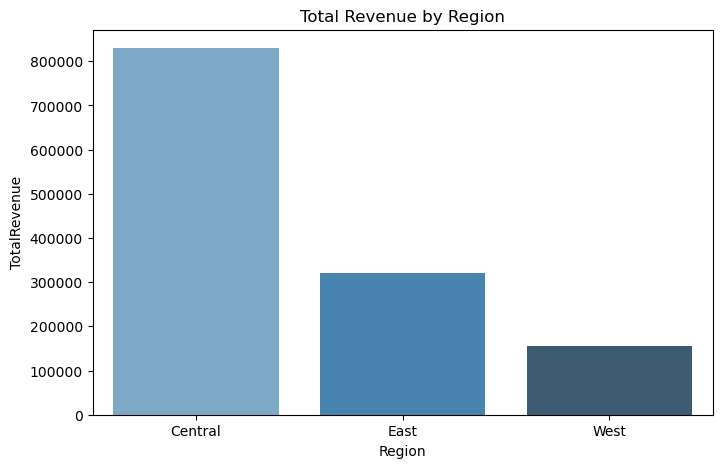

In [24]:
# Step 4: Visualization
# 1) Bar Chart - Total Revenue by Region
plt.figure(figsize=(8, 5))
region_revenue = sales_df.groupby("Region")["TotalRevenue"].sum().reset_index()
sns.barplot(data=region_revenue, x="Region", y="TotalRevenue", palette="Blues_d")
plt.title("Total Revenue by Region")
plt.show()

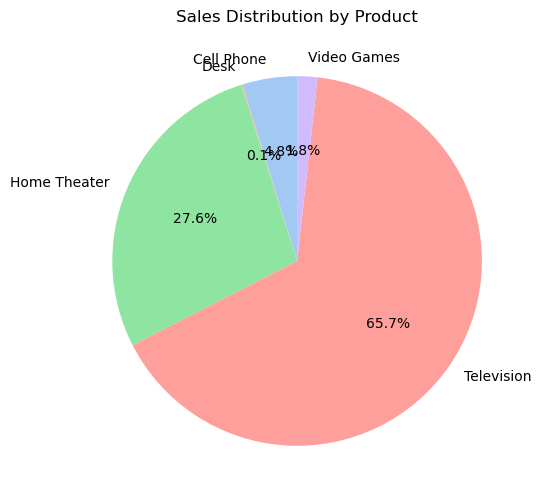

In [25]:
# 2) Pie Chart - Sales by Product Item
plt.figure(figsize=(6, 6))
product_sales = sales_df.groupby("Item")["TotalRevenue"].sum()
product_sales.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Sales Distribution by Product")
plt.ylabel('')
plt.show()

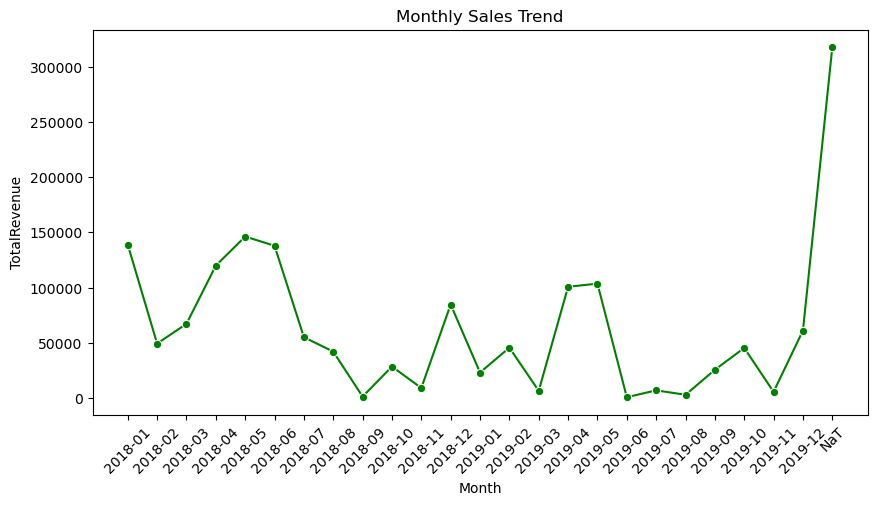

In [26]:
# 3) Line Chart - Monthly Sales Trend
sales_df["Month"] = sales_df["OrderDate"].dt.to_period('M').astype(str)
monthly_sales = sales_df.groupby("Month")["TotalRevenue"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x="Month", y="TotalRevenue", marker="o", color='green')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.show()